In [129]:
import sys
sys.path.append('../')

import torch
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

from data import *
from models import SimpleNP

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ds = SimpleSine()
loader = DataLoader(ds, batch_size=16, shuffle=True)

xc, yc = loader.__iter__().__next__()

batch_sz, num_points = xc.size(0), xc.size(1)
context_data = torch.cat((xc, yc), -1).view(batch_sz * num_points, -1)


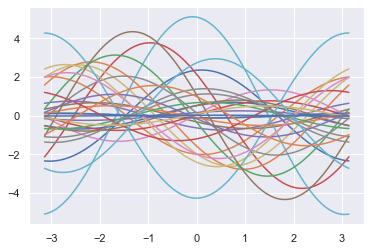

In [3]:
sns.set()
x, _ = ds[0]
for index in range(32):
    _, y = ds[index]
    plt.plot(x, y)

In [85]:
ds = SimpleSine()
loader = DataLoader(ds, batch_size=16, shuffle=True)

In [4]:
x, y = loader.__iter__().__next__()

xc, yc = x[:8], y[:8]
xt, yt = x[8:], y[8:]

model = SimpleNP()
model.eval()

yt_hat = model(xc, yc, xt, yt)

In [5]:
x, y = loader.__iter__().__next__()

xc, yc = x[:8], y[:8]
xt, yt = x[8:], y[8:]

model = SimpleNP()

yt_hat, qz_c, qz_ct = model(xc, yc, xt, yt)

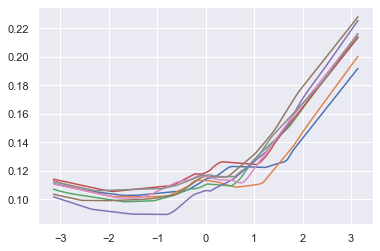

In [6]:
sns.set()
x, _ = ds[0]
for index in range(8):
    y = yt_hat[index].detach().numpy()
    plt.plot(x, y)

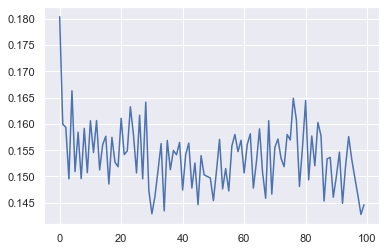

In [7]:
ds = SimpleSine()
loader = DataLoader(ds, batch_size=16, shuffle=True)
model = SimpleNP()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_hist = []

loss_func = torch.nn.MSELoss()
num_epochs = 100


for _ in range(num_epochs):
    epoch_loss = 0
    for it, (x, y) in enumerate(loader):
        model.train()
        batch_sz = x.size(0)
        split = batch_sz // 2

        xc, yc = x[:split], y[:split]
        xt, yt = x[split:], y[split:]

        yt_hat, qz_c, qz_ct = model(xc, yc, xt, yt)

        # fix this
        mse_loss = loss_func(yt_hat, yt)
        # dep on this
        kl_loss = torch.distributions.kl_divergence(qz_c, qz_ct).mean(0).sum() 

        loss = kl_loss + mse_loss
        epoch_loss += (loss.item() / batch_sz)

        model.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
    
    loss_hist.append(epoch_loss / (it + 1))

    
    
plt.plot(loss_hist)
plt.show()

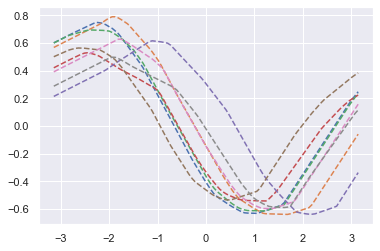

In [8]:
sns.set()
x, _ = ds[0]
for index in range(8):
    y = yt_hat[index].detach().numpy()
    plt.plot(x, y, '--')

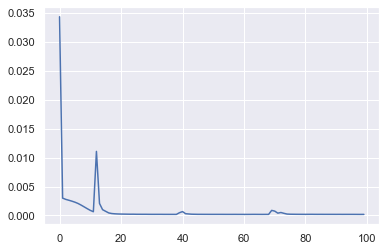

In [134]:
ds = SimpleNoiseSine()
loader = DataLoader(ds, batch_size=16, shuffle=True)
model = SimpleNP()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_hist = []

loss_func = torch.nn.MSELoss()
num_epochs = 100


for _ in range(num_epochs):
    epoch_loss = 0
    for it, (x, y) in enumerate(loader):
        model.train()
        batch_sz = x.size(0)
        split = batch_sz // 2

        xc, yc = x[:split], y[:split]
        xt, yt = x[split:], y[split:]

        yt_hat, qz_c, qz_ct = model(xc, yc, xt, yt)

        # fix this
        mse_loss = loss_func(yt_hat, yt)
        # dep on this
        kl_loss = torch.distributions.kl_divergence(qz_c, qz_ct).mean(0).sum() 

        loss = kl_loss + mse_loss
        epoch_loss += (loss.item() / batch_sz)

        model.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
    
    loss_hist.append(epoch_loss / (it + 1))

    
    
plt.plot(loss_hist)
plt.show()

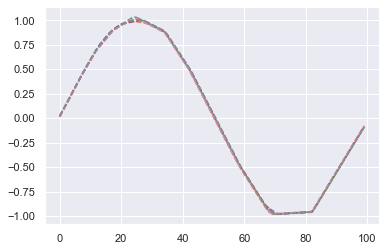

In [135]:
sns.set()
x, _ = ds[0]
for index in range(8):
    y = yt_hat[index].detach().numpy()
    plt.plot(x, y, '--')